In [1]:
#from sklearn.ensemble import RandomForestRegressor
import numpy as np
import anndata
import sys, os
import pandas as pd
import stereosite

### Cellular Neighborhood (CN)

**Load adata**

In [4]:
# Read gene expression matrix and transform it to anndata by gem2anndata() function. If cell mask file was given, use gem_with_cellmask_2anndata() function
# to transfer gem to anndata in single-cell resolution

from stereosite.read.gem import Gem_Reader
gem_file = "./data/SS200000681TL_A1.tissue.gem.gz"
mask_file = "./data/SS200000681TL_A1_mask.tif"
gem_reader = Gem_Reader(gem_file)
adata = gem_reader.gem_with_cellmask_2anndata(mask_file)
adata

In [5]:
from stereosite.read.gem import Gem_Reader
gem_file = "./data/SS200000681TL_A1.tissue.gem.gz"
gem_reader = Gem_Reader(gem_file)
adata = gem_reader.gem2anndata(200)
adata

In [10]:
adata.write("./data/SS200000681TL_A1_bin200.h5ad")

**Cell2location annotation**

In [5]:
from stereosite.cn.deconvolution import Cell2location
ref_file = "./data/inf_aver_noCAF.csv"
adata_file = "./data/SS200000681TL_A1_bin200.h5ad"
out_dir = "./data/deconvolution"
cell2loc = Cell2location(ref_file, adata_file, out_dir = out_dir, bin_size = 200, gpu = False)

In [ ]:
inf_aver = pd.read_csv(ref_file, index_col=0)
adata_vis = cell2loc.process_vis(inf_aver, max_epochs=50)
#cell2loc.run_deconvolution()

Anndata setup with scvi-tools version 0.19.0.

Setup via `Cell2location.setup_anndata` with arguments:

{
│   'layer': None,
│   'batch_key': None,
│   'labels_key': None,
│   'categorical_covariate_keys': None,
│   'continuous_covariate_keys': None
}

         Summary Statistics         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃     Summary Stat Key     ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│         n_batch          │   1   │
│         n_cells          │ 4683  │
│ n_extra_categorical_covs │   0   │
│ n_extra_continuous_covs  │   0   │
│         n_labels         │   1   │
│          n_vars          │ 10498 │
└──────────────────────────┴───────┘

               Data Registry                
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registry Key ┃    scvi-tools Location    ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      X       │          adata.X          │
│    batch     │ adata.obs['_scvi_batch']  │
│    ind_x     │   adata.obs['_indices']   │
│    labels    │ adata.obs['_scvi_labels'] │
└──────────────┴───────────────────────────┘

                     batch State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃     Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_batch'] │     0      │          0          │
└──────────────────────────┴────────────┴─────────────────────┘

                     labels State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/liuxing2/.conda/envs/liuxing2_r4/lib/python3.7/site-packages/pytorch_lightning/trainer/trainer.py:1767: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=8)`.
  category=PossibleUserWarning,
/home/liuxing2/.conda/envs/liuxing2_r4/lib/python3.7/site-packages/pytorch_lightning/trainer/configuration_validator.py:105: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
  rank_zero_warn("You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.")
/home/liuxing2/.conda/envs/liuxing2_r4/lib/python3.7/site-packages/pytorch_lightning/trainer/trainer.py:1896: PossibleUserWarning: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value f

Epoch 50/50: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:12<00:00,  3.61s/it, v_num=1, elbo_train=6.74e+7]

`Trainer.fit` stopped: `max_epochs=50` reached.


Sampling local variables, batch:   0%|                                                                                                             | 0/1 [00:00<?, ?it/s]

**CN analysis**

In [6]:
from stereosite.cn.cellneighbor import cn_deconvolve
adata_file = "./data/SS200000681TL_A1_bin200_sp.h5ad"
adata = anndata.read(adata_file)
cn_deconvolve(adata)

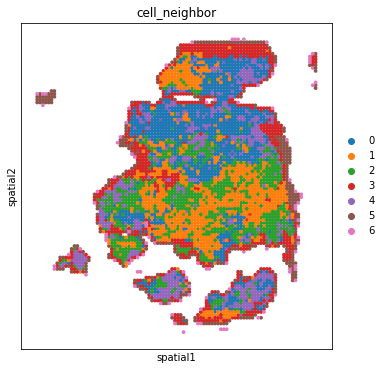

In [7]:
from stereosite.plot.cellneighbor import umap, heatmap, spatial
spatial(adata, spot_size = 200)

In [2]:
#load the data with deconvolution result
adata_file = "./data/SS200000681TL_A1_sp.h5ad"
adata = anndata.read(adata_file)
from stereosite.cn.cellneighbor import cn_cellbin
cn_cellbin(adata, 400, n_neighbors = 20, resolution = 0.4, min_dist = 0.1)

2023-07-19 09:43:34.338599: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-19 09:44:03.144915: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /ldfssz1/ST_BIGDATA/USER/liuxing2/lib/htslib-1.9/lib:/ldfssz1/ST_BIGDATA/USER/liuxing2/lib_os7/opencv-4.5.1/lib64:/ldfssz1/ST_BIGDATA/USER/liuxing2/lib/mpfr-4.0.2/lib:/ldfssz1/ST_BIGDATA/USER/liuxing2/lib/gmp-6.1.2/lib:/ldfssz1/ST_BIGDATA/USER/liuxing2/lib/mpc-1.1.0/lib:/ldfssz1/ST_BIGDATA/USER/liuxing2/lib/bzip2-1.0.6/lib:/ldfssz1/ST_BIGDATA/USER/liuxing2/lib_os7/geos-3.10.2/lib64:/ldfssz1/ST_BIGD

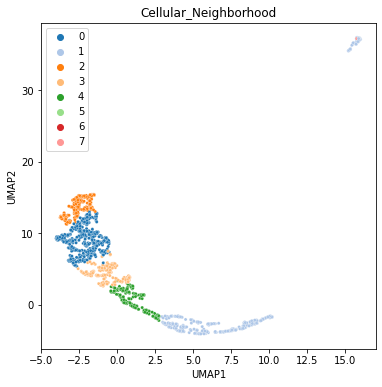

In [3]:
from stereosite.plot.cellneighbor import umap, heatmap, spatial
umap(adata)

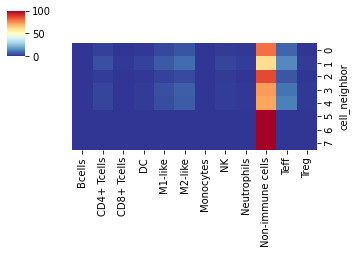

In [4]:
heatmap(adata)

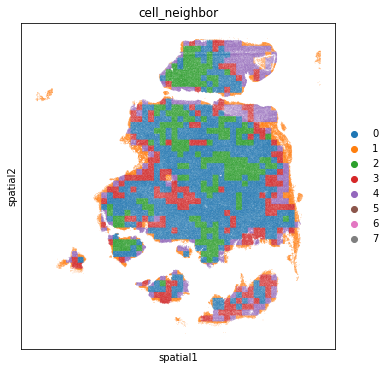

In [5]:
spatial(adata, spot_size = 20)

### SCII

In [ ]:
from stereosite.scii import intensities_count
interactiondb_file = "./data/CellChatDB.mouse.csv"
scii_dict = intensities_count(adata, interactiondb_file, distance_threshold = 50, anno = 'cell2loc_anno')

  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1764 [00:00<?, ?it/s]

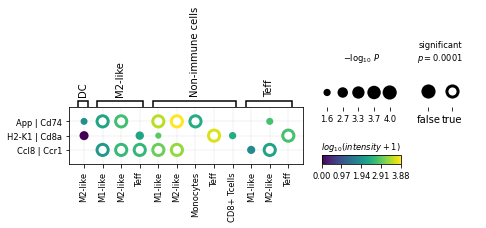

In [3]:
from stereosite.plot.scii import ligrec
import numpy as np
import pandas as pd
intensity =  scii_dict['intensities']
pvalues = scii_dict['pvalues']
index = [('App', 'Cd74'), ('H2-K1', 'Cd8a'), ('Ccl8', 'Ccr1')]
plot_data = {'intensities': intensity.loc[index],
            'pvalues': pvalues.loc[index]}
ligrec(plot_data,
        intensities_range=(50, np.inf),
        pvalue_threshold=0.05,
        alpha=1e-4,
        swap_axes=False,
        source_groups=["Non-immune cells", "M2-like", 'DC', 'Teff'],
        target_groups = ["M1-like", "M2-like", "Monocytes", "Teff", "CD8+ Tcells"],
        #target_groups=["Teff", "M1-like", "M2-like", "CD4+ Tcells", "CD8+ Tcells", "Monocytes", "Treg", "Bcells", "DC", "Neutrophils", "NK"],
        #remove_nonsig_interactions=True,
        title=" ",
)

4755

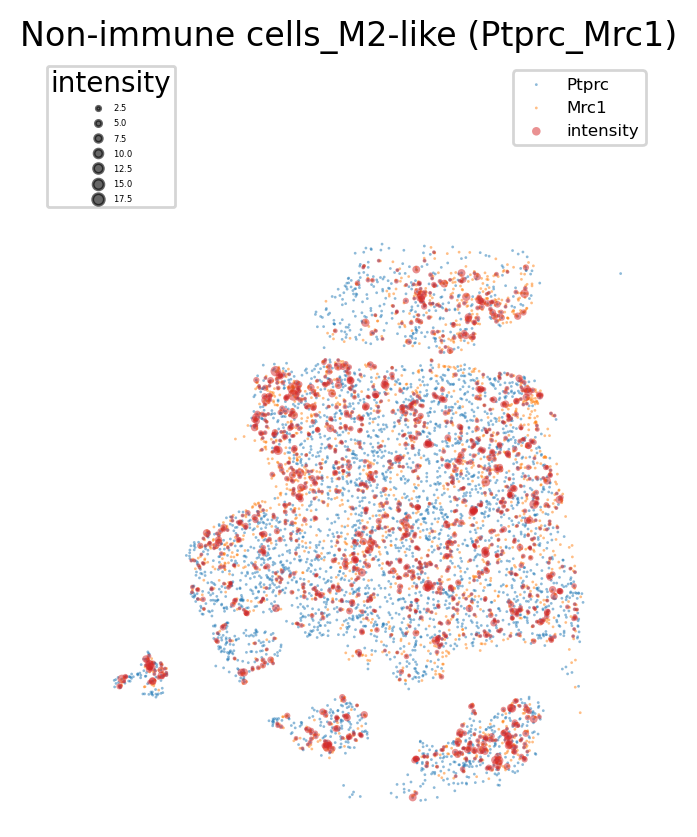

In [5]:
from stereosite.plot.intensity import intensity_insitu
cells = ['Non-immune cells', 'M2-like']
genes = ['Ptprc', 'Mrc1']
intensity_insitu(adata, cells, genes, radius = 50)

### Differential gene

In [20]:
from stereosite.degene import deseq2

In [21]:
adata = anndata.read("./data/degene_test.h5ad")
adata

DEBUG:h5py._conv:Creating converter from 3 to 5


AnnData object with n_obs × n_vars = 15842 × 22261
    obs: 'x', 'y', 'n_genes', 'n_genes_by_counts', 'total_counts', 'cell2loc_anno', 'cell_neighbor', 'sample'
    obsm: 'MT', 'X_pca', 'X_tsne', 'X_umap', 'spatial'

In [22]:
adata.X.data[0:10]

array([5., 1., 6., 5., 1., 1., 2., 1., 1., 1.], dtype=float32)

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 14.65 seconds.

Fitting dispersion trend curve...
... done in 4.50 seconds.

Fitting MAP dispersions...
... done in 12.39 seconds.

Fitting LFCs...
... done in 3.85 seconds.

Refitting 64 outliers.

Fitting dispersions...
... done in 0.04 seconds.

Fitting MAP dispersions...
... done in 0.04 seconds.

Fitting LFCs...
... done in 0.05 seconds.

Running Wald tests...
... done in 0.86 seconds.

Log2 fold change & Wald test p-value: deGroup 5 vs Others


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0610005C13Rik,0.326400,-1.496184,2.194745,-0.681712,0.495421,NaN
0610009B22Rik,2.967093,-0.629725,0.562253,-1.120003,0.262713,0.393999
0610009O20Rik,8.543862,-0.431208,0.170688,-2.526300,0.011527,0.045323
0610010F05Rik,5.817026,-1.061311,0.319444,-3.322370,0.000893,0.007582
0610010K14Rik,8.447999,-0.451437,0.312409,-1.445020,0.148452,0.266028
...,...,...,...,...,...,...
mt-Nd1,676.975586,-1.196285,0.460840,-2.595878,0.009435,0.039672
mt-Nd2,305.047455,-0.999092,0.282182,-3.540587,0.000399,0.004180
mt-Nd4,563.605896,-1.230651,0.255537,-4.815939,0.000001,0.000048
mt-Nd5,55.131897,-0.620642,0.276814,-2.242090,0.024956,0.077929


Fitting MAP LFCs...
... done in 2.75 seconds.

Shrunk Log2 fold change & Wald test p-value: deGroup 5 vs Others


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0610005C13Rik,0.326400,0.004851,0.450098,-0.681712,0.495421,NaN
0610009B22Rik,2.967093,-0.218255,0.412166,-1.120003,0.262713,0.393999
0610009O20Rik,8.543862,-0.382005,0.164945,-2.526300,0.011527,0.045323
0610010F05Rik,5.817026,-0.900138,0.323969,-3.322370,0.000893,0.007582
0610010K14Rik,8.447999,-0.323303,0.290293,-1.445020,0.148452,0.266028
...,...,...,...,...,...,...
mt-Nd1,676.975586,-0.838580,0.537941,-2.595878,0.009435,0.039672
mt-Nd2,305.047455,-0.957855,0.290803,-3.540587,0.000399,0.004180
mt-Nd4,563.605896,-1.289012,0.254281,-4.815939,0.000001,0.000048
mt-Nd5,55.131897,-0.516646,0.275882,-2.242090,0.024956,0.077929


DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/jdfssz2/ST_BIOINTEL/P20Z10200N0039/06.groups/03.Preclinical_and_clinical_platform/liuchuandong/.conda/envs/StereoSITE_py39/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymBol.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/jdfssz2/ST_BIOINTEL/P20Z10200N0039/06.groups/03.Preclinical_and_clinical_platform/liuchuandong/.conda/envs/StereoSITE_py39/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBolIta.ttf', name='STIXNonUnicode', st

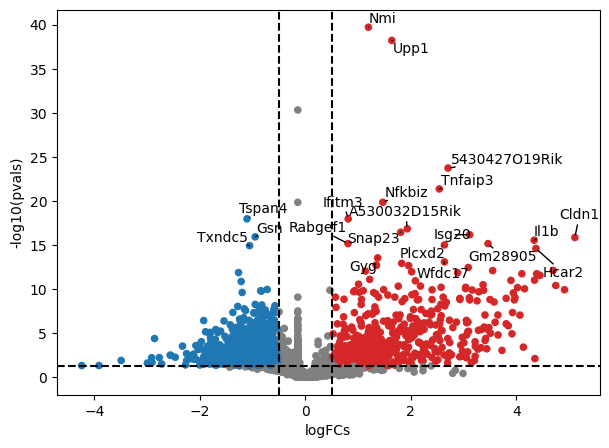

In [23]:
result_df = deseq2(adata,sample_col='sample',groups_col='cell_neighbor',contrast=['5','Others'],batch='sample',save='cn5.vs.others.volcano.png')

In [24]:
result_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0610005C13Rik,0.326400,0.004851,0.450098,-0.681712,0.495421,NaN
0610009B22Rik,2.967093,-0.218255,0.412166,-1.120003,0.262713,0.393999
0610009O20Rik,8.543862,-0.382005,0.164945,-2.526300,0.011527,0.045323
0610010F05Rik,5.817026,-0.900138,0.323969,-3.322370,0.000893,0.007582
0610010K14Rik,8.447999,-0.323303,0.290293,-1.445020,0.148452,0.266028
...,...,...,...,...,...,...
mt-Nd1,676.975586,-0.838580,0.537941,-2.595878,0.009435,0.039672
mt-Nd2,305.047455,-0.957855,0.290803,-3.540587,0.000399,0.004180
mt-Nd4,563.605896,-1.289012,0.254281,-4.815939,0.000001,0.000048
mt-Nd5,55.131897,-0.516646,0.275882,-2.242090,0.024956,0.077929


### PPI

In [10]:
up_gene = result_df[(result_df['pvalue']<0.05) & (result_df['log2FoldChange']>1)].index
up_gene = list(up_gene)
len(up_gene)

414

In [3]:
import stereosite
from stereosite.ppi import query

**Load STRING database**

In [4]:
protein_info = pd.read_table('../stereosite/datasets/STRINGdb/Mmu/10090.protein.info.v11.5.txt',delimiter='\t',comment=None)
protein_alias = pd.read_table('../stereosite/datasets/STRINGdb/Mmu/10090.protein.aliases.v11.5.txt',delimiter='\t',comment=None)
full_net = pd.read_table('../stereosite/datasets/STRINGdb/Mmu/10090.protein.links.full.v11.5.txt',delimiter=' ')
full_net=full_net.loc[:,['protein1','protein2','combined_score']]
full_net

,protein1,protein2,combined_score
0,10090.ENSMUSP00000000001,10090.ENSMUSP00000031145,161
1,10090.ENSMUSP00000000001,10090.ENSMUSP00000071486,208
2,10090.ENSMUSP00000000001,10090.ENSMUSP00000119330,183
3,10090.ENSMUSP00000000001,10090.ENSMUSP00000066449,259
4,10090.ENSMUSP00000000001,10090.ENSMUSP00000061539,229
...,...,...,...
14496353,10090.ENSMUSP00000141183,10090.ENSMUSP00000130793,150
14496354,10090.ENSMUSP00000141183,10090.ENSMUSP00000135905,150
14496355,10090.ENSMUSP00000141183,10090.ENSMUSP00000139505,248
14496356,10090.ENSMUSP00000141183,10090.ENSMUSP00000048340,211


**Query input gene and their ppi network from STRING database**

In [11]:
query_net = query.get_PPInet(query_term=up_gene,protein_info=protein_info,protein_alias=protein_alias,full_net=full_net,score_cutoff=0.4)
query_net

remove terms with duplicated protein id: 
         0 preferred_name  alias        #string_protein_id
131  Gbp2b           None  Gbp2b  10090.ENSMUSP00000029936


In [12]:
print(query_net)

Graph with 315 nodes and 2084 edges


In [13]:
from stereosite.ppi import ppi_analysis

**Markov CLustering**

In [14]:
mcl_result = ppi_analysis.mcl(query_net,inflation=4.0)
mcl_result

CRITICAL:root:Make sure the Markov CLuster algorithm (MCL,https://github.com/micans/mcl) be installed properly.
INFO:root:mcl result be stored in: PPI/out.query_net_edgelist.txt.I40
INFO:root:Get 99 clusters by markov clustering
INFO:root:The lagrest cluster with 65 nodes


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,Nfkbia,Ccl2,Ifnb1,Ccl4,Irf1,Nfkbiz,Cxcl1,Mxd1,Tlr6,Mmp9,...,Prok2,Cd24a,Hcar2,Csf3r,Ifi208,Il1rap,Cldn1,Ffar2,Fap,Tbc1d8
1,Isg15,Ifit1,Ifit2,Oasl1,Ifit3,Usp18,Ddx60,Rsad2,Gbp2,Gbp5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Klf6,Junb,Atf3,Btg2,Cebpb,Fos,Gadd45b,Zfp36,Ets2,Csrnp1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H2-T3,Snap23,Stxbp5,E330009J07Rik,Rab44,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Rdh12,Dgat1,Lipg,Lpcat2,Dgat2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Cyth1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,9930111J21Rik2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,Stfa3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,Rab11fip1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Analysising largest cluster 0 and get hub net**

In [16]:
cluster0_net = ppi_analysis.get_cluster_net(query_net,mcl_result,mcl_id=0)
print(cluster0_net)

Graph with 65 nodes and 599 edges


In [17]:
hub_genes = ppi_analysis.get_MCC_hub_genes(cluster0_net)
hub_genes

Top10 MCC scores are: [16, 15, 14, 13, 12, 11, 10, 9, 8, 7]
Top10 degree are: [55, 44, 40, 39, 38, 37, 36, 35, 34, 33]


,hub_genes,degree,MCC_score
0,Il1b,55,16
1,Ccl2,44,16
2,Cxcl10,40,16
3,Cxcl1,39,16
4,Cxcl2,38,16
5,Il1a,37,16
6,Csf2,37,16
7,Mmp9,37,16
8,Ccl4,36,16
9,Il18,35,16


In [18]:
hub_net = ppi_analysis.get_hub_net(hub_genes['hub_genes'],cluster0_net,cutoff=0.8)
print(hub_net)

Graph with 35 nodes and 105 edges


**Plot hub ppi net**

In [19]:
from stereosite.plot import net

In [31]:
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7f7ab0e702e0>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7f7ad309da30>
DEBUG:matplotlib.backends.backend_pdf:Assigning font /F1 = '/jdfssz2/ST_BIOINTEL/P20Z10200N0039/06.groups/03.Preclinical_and_clinical_platform/liuchuandong/.conda/envs/StereoSITE_py39/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf'
DEBUG:matplotlib.backends.backend_pdf:Assigning font /F2 = '/jdfssz2/ST_BIOINTEL/P20Z10200N0039/06.groups/03.Preclinical_and_clinical_platform/liuchuandong/.conda/envs/StereoSITE_py39/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
DEBUG:matplotlib.backends.backend_pdf:Embedding font /jdfssz2/ST_BIOINTEL/P20Z10200N0039/06.groups/03.Preclinical_and_clinical_platform/liuchuandong/.conda/envs/StereoSITE_py39/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf.
DEBUG:matplotlib.backends.backend_pdf:W

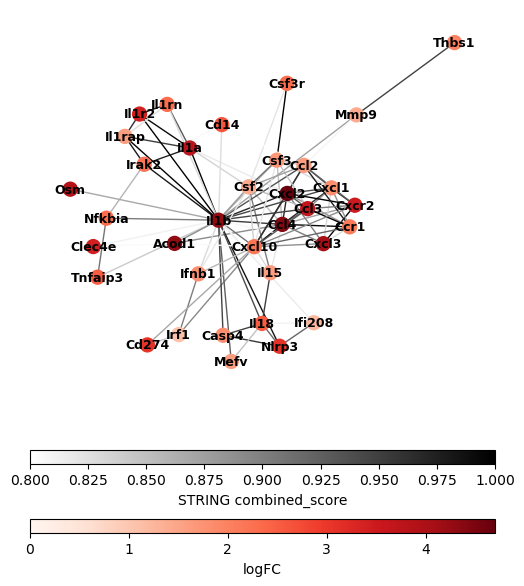

In [32]:
net.ppi_hub_net(hub_net,hub_gene=hub_genes['hub_genes'],logFC_df=result_df,name='log2FoldChange',save='./PPI/hub_net_cluster0.pdf')

### TF activity inference

**Load gene regulatory network (grn) from dorothea**

In [14]:
dorothea = pd.read_csv('../stereosite/datasets/TF_database/dorothea_TF-target_regulons_mm.csv',index_col=0)
dorothea

,source,confidence,target,mor
1,Myc,A,Tert,1.000000
2,Smad3,A,Jun,1.000000
3,Smad4,A,Jun,1.000000
4,Sp1,A,Aldoa,1.000000
5,Tp53,A,Igf1r,-1.000000
...,...,...,...,...
28415,Zfp644,C,Nr3c1,0.333333
28416,Zfp644,C,Pknox1,0.333333
28417,Zfp644,C,Sde2,0.333333
28418,Zfp644,C,Stxbp5,0.333333


**Activity inference with Univariate Linear Model (ULM)**

In [36]:
from stereosite.tf_infer import ulm

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7f7ab0f22100>


Running ulm on mat with 1 samples and 16632 targets for 269 sources.


DEBUG:matplotlib.backends.backend_pdf:Assigning font /F1 = '/jdfssz2/ST_BIOINTEL/P20Z10200N0039/06.groups/03.Preclinical_and_clinical_platform/liuchuandong/.conda/envs/StereoSITE_py39/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
DEBUG:matplotlib.backends.backend_pdf:Embedding font /jdfssz2/ST_BIOINTEL/P20Z10200N0039/06.groups/03.Preclinical_and_clinical_platform/liuchuandong/.conda/envs/StereoSITE_py39/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
DEBUG:matplotlib.backends.backend_pdf:Writing TrueType font.


,tf_acts,tf_pvals
Ahr,0.604467,0.545542
Ar,2.653260,0.007979
Arid2,1.166294,0.243512
Arid3a,1.972264,0.048596
Arnt,0.863094,0.388098
...,...,...
Znf143,0.080906,0.935518
Znf24,-0.121081,0.903629
Znf263,-1.327811,0.184259
Znf592,-0.701283,0.483136


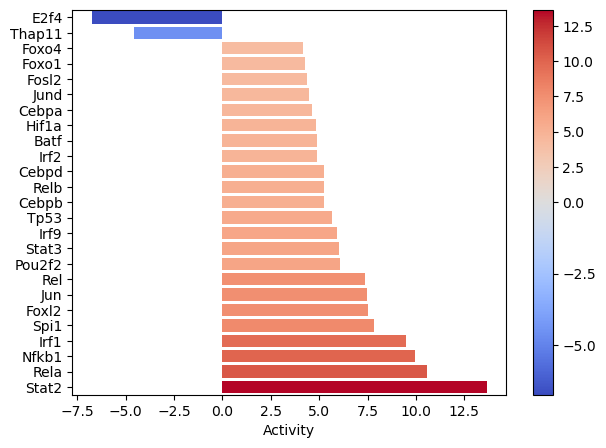

In [47]:
tf_df = ulm(de_result=result_df,grn=dorothea,weight='mor',save='./TF/tf_infer.pdf')
tf_df

**Plot TFs regulatory network in pathway**

**Get significantly active TFs for pathway of interest**

In [6]:
Nfkpb_path = pd.read_csv('./data/Nfkpb_pathway_mmu04064.txt',header=None)
Nfkpb_path = [i for i in Nfkpb_path[0] if i in result_df.index]
len(Nfkpb_path)

95

In [7]:
sig_tf = [i for i in tf_df[tf_df['tf_pvals']<0.05].index if i in Nfkpb_path]
sig_tf

['Nfkb1', 'Nfkb2', 'Rela', 'Relb']

In [10]:
result_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0610005C13Rik,0.326400,0.004851,0.450098,-0.681712,0.495421,NaN
0610009B22Rik,2.967093,-0.218255,0.412166,-1.120003,0.262713,0.393999
0610009O20Rik,8.543862,-0.382005,0.164945,-2.526300,0.011527,0.045323
0610010F05Rik,5.817026,-0.900138,0.323969,-3.322370,0.000893,0.007582
0610010K14Rik,8.447999,-0.323303,0.290293,-1.445020,0.148452,0.266028
...,...,...,...,...,...,...
mt-Nd1,676.975600,-0.838580,0.537941,-2.595878,0.009435,0.039672
mt-Nd2,305.047450,-0.957855,0.290803,-3.540587,0.000399,0.004180
mt-Nd4,563.605900,-1.289012,0.254281,-4.815939,0.000001,0.000048
mt-Nd5,55.131897,-0.516646,0.275882,-2.242090,0.024956,0.077929


In [8]:
import stereosite
from stereosite.plot import net

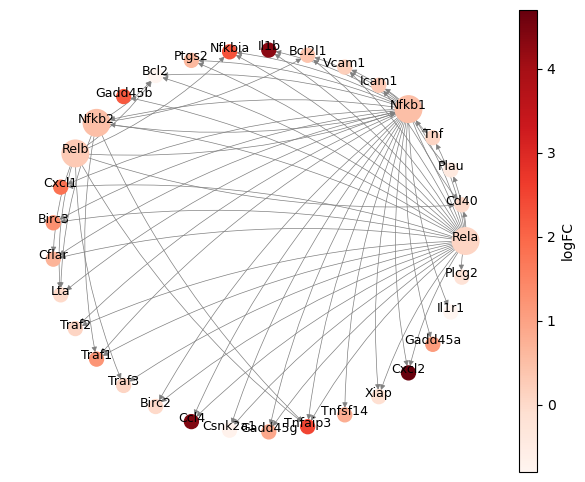

In [9]:
net.tf_net(sig_tf,grn=dorothea,logFC_df=result_df,name='log2FoldChange',pathway_genes=Nfkpb_path,source='source',target='target',save='./TF/TF_net.pdf')